## 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

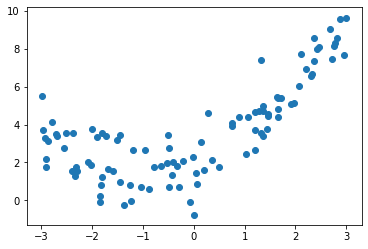

In [3]:
plt.scatter(x, y)
plt.show()

### 学习曲线

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
X_train.shape

(75, 1)

In [6]:
# 先用线性模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
train_score = []
test_score = []

for i in range(1, len(X_train)+1):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

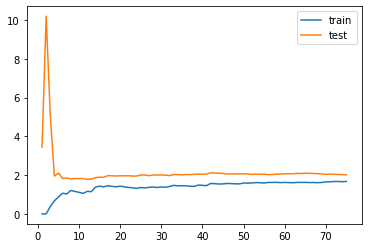

In [8]:
plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

In [17]:
# 我们把上面的过程包装成一个方法
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []

    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 6])
    plt.show()

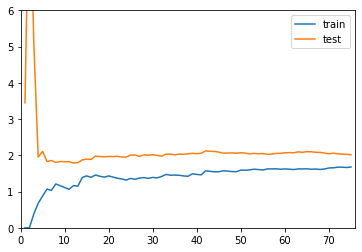

In [18]:
# 还是用线性模型试试上面的公共函数
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

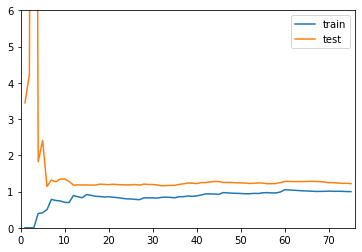

In [19]:
# 二次幂多项式
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly2_reg = PolynomialRegression(degree=2)

plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

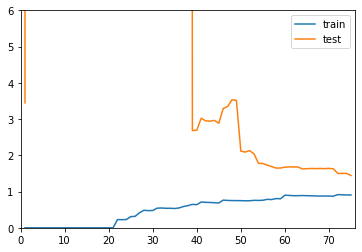

In [20]:
# 20次幂多项式
poly20_reg = PolynomialRegression(degree=20)

plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

### 从上面3个不同模型的学习曲线可以看出：线性（1次幂）模型是欠拟合，二次幂多项式模型是最佳，20次幂多项式模型是过拟合

* 欠拟合中，训练数据集和测试数据集区域平稳的高度比最佳情况下要高，说明欠拟合的情况下无论对于训练数据集还是测试数据集来说误差都比较大。那是因为选的模型不对所以即使在训练数据集上它的误差也是大的。
* 对于过拟合的情况，它的训练数据集的误差和最佳情况是差不多的值，但是过拟合的问题在于，测试数据集的误差离训练数据集的误差比较远，这就说明我们选的模型泛华能力不够好，对于新的数据来说误差是比较大的。